In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math
import pandas as pd
import os, sys

In [3]:
tbin_vec = np.array([0.05, 0.1, 0.2, 1.0, 2.0, 3.0])
mainpath =  '/Users/co15268/OneDrive - University of Bristol/eightprobe/Eight_Probe/npy/communities/'
file_list_Krebs = [mainpath+'Krebs_0p05_rectified_total_signal_final_cell_info.pkl',mainpath+'Krebs_0p1_rectified_total_signal_final_cell_info.pkl',mainpath+'Krebs_0p2_rectified_total_signal_final_cell_info.pkl',mainpath+'Krebs_1p0_rectified_total_signal_final_cell_info.pkl',mainpath+'Krebs_2p0_rectified_total_signal_final_cell_info.pkl',mainpath+'Krebs_3p0_rectified_total_signal_final_cell_info.pkl']
file_list_Robbins = [mainpath+'Robbins_0p05_rectified_total_signal_final_cell_info.pkl',mainpath+'Robbins_0p1_rectified_total_signal_final_cell_info.pkl',mainpath+'Robbins_0p2_rectified_total_signal_final_cell_info.pkl',mainpath+'Robbins_1p0_rectified_total_signal_final_cell_info.pkl',mainpath+'Robbins_2p0_rectified_total_signal_final_cell_info.pkl',mainpath+'Robbins_3p0_rectified_total_signal_final_cell_info.pkl']
file_list_Waksman = [mainpath+'Waksman_0p05_rectified_total_signal_final_cell_info.pkl',mainpath+'Waksman_0p1_rectified_total_signal_final_cell_info.pkl',mainpath+'Waksman_0p2_rectified_total_signal_final_cell_info.pkl',mainpath+'Waksman_1p0_rectified_total_signal_final_cell_info.pkl',mainpath+'Waksman_2p0_rectified_total_signal_final_cell_info.pkl',mainpath+'Waksman_3p0_rectified_total_signal_final_cell_info.pkl']
file_lists = [file_list_Krebs,file_list_Robbins,file_list_Waksman]

In [9]:
def computeFractionSameCommunity(filepath):
    infile = open(filepath,'rb')
    data_load = pickle.load(infile)
    infile.close()
    
    # extract cluster ids and convert to array
    a = data_load["consensus_cluster"].items()
    b = list(a)
    c = np.array(b)
    cluster_ids = c[:,1]
    nclusters = len(set(cluster_ids))
    
    a = data_load.index
    cell_ids = list(a) # get cell ids
    ncells = len(cell_ids)
    npairs = ncells*(ncells-1)/2
    count_intra_same_community = 0
    count_inter_same_community = 0
    count_intra_total = 0
    count_inter_total = 0
    for i in range(ncells):
        for j in range(ncells):
            if i > j:
                if data_load.loc[cell_ids[i],'cell_region'] == data_load.loc[cell_ids[j],'cell_region']:
                    count_intra_total += 1
                    if data_load.loc[cell_ids[i],'consensus_cluster'] == data_load.loc[cell_ids[j],'consensus_cluster']:
                        count_intra_same_community += 1
                else:
                    count_inter_total += 1
                    if data_load.loc[cell_ids[i],'consensus_cluster'] == data_load.loc[cell_ids[j],'consensus_cluster']:
                        count_inter_same_community += 1
    count_same_community = count_intra_same_community + count_inter_same_community
    fraction_same_community = count_same_community/npairs
    fraction_intra_same_community = count_intra_same_community/count_intra_total
    fraction_inter_same_community = count_inter_same_community/count_inter_total
    commnuities_per_100_neurons = 100*nclusters/ncells
    return fraction_intra_same_community, fraction_inter_same_community,fraction_same_community,commnuities_per_100_neurons

In [5]:
# compute for various time bins
nfiles = len(file_list_Krebs)
fraction_intra_same_community_vec = np.zeros((nfiles,3))
fraction_inter_same_community_vec = np.zeros((nfiles,3))
fraction_same_community_vec = np.zeros((nfiles,3))
commnuities_per_100_neurons = np.zeros((nfiles,3))
for j in range(3):
    for i in range(nfiles):
        f1,f2,f3,ncomm = computeFractionSameCommunity(file_lists[j][i])
        fraction_intra_same_community_vec[i,j] = f1
        fraction_inter_same_community_vec[i,j] = f2
        fraction_same_community_vec[i,j] = f3
        commnuities_per_100_neurons[i,j] = ncomm
mean_fraction_intra_same_community = np.mean(fraction_intra_same_community_vec,axis=1)
mean_fraction_inter_same_community = np.mean(fraction_inter_same_community_vec,axis=1)
mean_commnuities_per_100_neurons = np.mean(commnuities_per_100_neurons,axis=1)

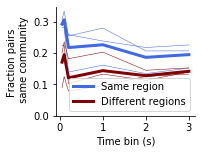

In [6]:
plt.figure(figsize=(2.5,2))
plt.plot(tbin_vec,mean_fraction_intra_same_community,c="royalblue",linewidth=3)
plt.plot(tbin_vec,mean_fraction_inter_same_community,c="maroon",linewidth=3)
plt.plot(tbin_vec,fraction_intra_same_community_vec,c="royalblue",label=None,linewidth=0.5)
plt.plot(tbin_vec,fraction_inter_same_community_vec,c="maroon",linewidth=0.5,label=None)
#plt.plot(tbin_vec,fraction_same_community_vec,c='black',linestyle='dashed')
plt.xlabel('Time bin (s)')
plt.ylabel('Fraction pairs \n same community')
plt.gca().set_yticks([0, 0.1, 0.2, 0.3])
plt.legend(['Same region','Different regions'])
plt.gca().set_ylim(bottom=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("/Users/co15268/OneDrive - University of Bristol/eightprobe/cian_code/fraction_same_community.svg", bbox_inches='tight',facecolor='white')
plt.show()

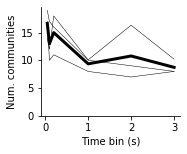

In [37]:
plt.figure(figsize=(2.5,2))
plt.plot(tbin_vec,4.95*mean_commnuities_per_100_neurons,c='black',linewidth=3)
plt.plot(tbin_vec,4.95*commnuities_per_100_neurons,c='black',linewidth=0.5)
plt.xlabel('Time bin (s)')
# plt.ylabel('Number of communities \n per 100 neurons')
plt.ylabel('Num. communities')
plt.gca().set_ylim(bottom=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("/Users/co15268/OneDrive - University of Bristol/eightprobe/cian_code/number_communities_vs_tbin.svg", bbox_inches='tight',facecolor='white')
plt.show()

In [43]:
diff_fraction_same_community = fraction_intra_same_community_vec - fraction_inter_same_community_vec
mean_diff_fraction_same_community = mean_fraction_intra_same_community - mean_fraction_inter_same_community

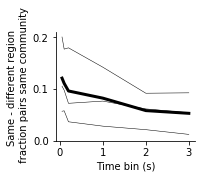

In [44]:
plt.figure(figsize=(2.5,2))
plt.plot(tbin_vec,mean_diff_fraction_same_community,c='black',linewidth=3)
plt.plot(tbin_vec,diff_fraction_same_community,c='black',linewidth=0.5)
plt.xlabel('Time bin (s)')
plt.ylabel('Same - different region \n fraction pairs same community')
plt.gca().set_ylim(bottom=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_yticks([0, 0.1, 0.2])
plt.savefig("/Users/co15268/OneDrive - University of Bristol/eightprobe/cian_code/intra_minus_inter_fraction.svg", bbox_inches='tight',facecolor='white')
plt.show()

In [45]:
# load correlations
corr_Krebs_0p1_full = pd.read_csv('/Users/co15268/OneDrive - University of Bristol/eightprobe/downdata/analysis_csvs/Krebs_0p1_analysis.csv')
corr_Krebs_0p01_full = pd.read_csv('/Users/co15268/OneDrive - University of Bristol/eightprobe/downdata/analysis_csvs/Krebs_0p01_analysis.csv')

In [58]:
# load data
cell_info = pd.read_csv('/Users/co15268/OneDrive - University of Bristol/eightprobe/Eight_Probe/csv/cell_info.csv')
cell_regions = cell_info.values[:,6]
cell_regions_sort_inds = np.array(sorted(range(len(cell_regions)),key=cell_regions.__getitem__))
cell_ids_sorted = cell_info.values[cell_regions_sort_inds,1]
cell_ids_sorted = np.array(cell_ids_sorted)
len(cell_ids_sorted)

6446

In [47]:
cell_regions_sort_inds_subset = []
for i in range(len(cell_ids_sorted)):
    if cell_ids_sorted[i] in ids:
        foundind = np.where(ids==cell_ids_sorted[i])[0][0]
        cell_regions_sort_inds_subset.append(ids[foundind])
cell_regions_sort_inds_subset=np.array(cell_regions_sort_inds_subset).astype(int)
len(cell_regions_sort_inds_subset)

NameError: name 'ids' is not defined

In [30]:
def getMeasureMatrix(analysis_frame, correlation_type):
    """
    Arguments:  analysis_frame, the frame containing the measure.
                correlation_type, str, total, conditional, or signal
    Returns:    numpy array (float), (num cell ids, num cell ids) 
    """
    if correlation_type == 'total':
        measure = 'corr_coef'
    elif correlation_type == 'conditional':
        measure = 'exp_cond_corr'
    elif correlation_type == 'signal':
        measure = 'signal_corr'
    else:
        sys.exit("unrecognised correlation type")
    cell_pairs = list(zip(analysis_frame.first_cell_id, analysis_frame.second_cell_id))
    cell_ids = pd.concat([analysis_frame.first_cell_id,analysis_frame.second_cell_id]).unique()
    measure_matrix = np.zeros([cell_ids.size, cell_ids.size])
    for pair, measure_value in zip(cell_pairs, analysis_frame[measure]):
        first_ind = np.flatnonzero(cell_ids == pair[0])[0]
        second_ind = np.flatnonzero(cell_ids == pair[1])[0]
        measure_matrix[first_ind, second_ind] = measure_value
        measure_matrix[second_ind, first_ind] = measure_value
    return measure_matrix, cell_ids

In [10]:
df_Krebs_0p1 = pd.read_csv(filepath+'Krebs_0p1_analysis.csv')
corr_matrix_Krebs_0p1, cell_ids = getMeasureMatrix(df_Krebs_0p1, 'total')
df_Krebs_1p0 = pd.read_csv(filepath+'Krebs_1p0_analysis.csv')
corr_matrix_Krebs_1p0, cell_ids = getMeasureMatrix(df_Krebs_1p0, 'total')

NameError: name 'filepath' is not defined

In [32]:
# function to reorganise into correlation matrix

def gencorrmat(csvfile):
    d = len(csvfile)
    idvec = np.zeros(d)
    idvec2 = np.zeros(d)
    for i in range(d):
        idvec[i] = int(csvfile[i][2])
        idvec2[i] = int(csvfile[i][5])
    ids = np.unique((idvec,idvec2))
    
    cell_regions_sort_inds_subset = []
    for i in range(len(cell_ids_sorted)):
        if cell_ids_sorted[i] in ids:
            foundind = np.where(ids==cell_ids_sorted[i])[0][0]
            cell_regions_sort_inds_subset.append(ids[foundind])
    cell_regions_sort_inds_subset=np.array(cell_regions_sort_inds_subset).astype(int)
    
    n = int((1 + math.sqrt(8*d+1))/2)
    C = np.zeros((n,n))
    for i in range(d):
        i_ind = np.where(cell_regions_sort_inds_subset==csvfile[i][2])[0][0]
        j_ind = np.where(cell_regions_sort_inds_subset==csvfile[i][5])[0][0]
        C[i_ind,j_ind] = csvfile[i][0]
        C[j_ind,i_ind] = csvfile[i][0]
    for i in range(n):
        C[i,i] = 1.
    return C

In [41]:
minlim = np.mean(corr_matrix_Krebs_1p0) - 1*np.std(corr_matrix_Krebs_1p0)
maxlim = np.mean(corr_matrix_Krebs_1p0) + 1*np.std(corr_matrix_Krebs_1p0)
plt.imshow(corr_matrix_Krebs_1p0,vmin=-0.05,vmax=0.3)
plt.colorbar()
# plt.title('Krebs 1 s')
plt.savefig("cormat_Krebs_1s.png",dpi=300)
print(np.median(corr_matrix_Krebs_1p0))

NameError: name 'corr_matrix_Krebs_1p0' is not defined

0.0168354695765


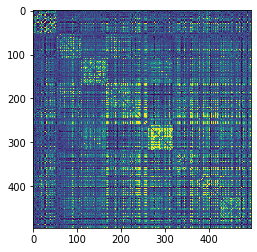

In [210]:
minlim2 = np.mean(corr_matrix_Krebs_0p1) - 3*np.std(corr_matrix_Krebs_0p1)
maxlim2 = np.mean(corr_matrix_Krebs_0p1) + 3*np.std(corr_matrix_Krebs_0p1)
plt.imshow(corr_matrix_Krebs_0p1,vmin=-0.05,vmax=0.2)
# plt.colorbar()
# plt.title('Krebs 100 ms')
plt.savefig("cormat_Krebs_100ms.png",dpi=300)
print(np.median(corr_matrix_Krebs_0p1))

In [36]:
def joinCellAnalysis(cell_info, analysis_frame):
    """
    For joining cell_info on an analysis_frame giving the regions of the first and second cells.
    Arguments:  cell_info, the cell info table
                analysis_frame, pandas DataFrame, corr_coef, corr_pv, first_cell_id, plugin_mi, plugin_shuff_mi, second_cell_id, shuff_corr, shuff_corr_pv
    Returns:    analysis frame with extra columns.
    """
    analysis_frame = analysis_frame.join(cell_info['cell_region'], how='left', on='first_cell_id')
    analysis_frame = analysis_frame.rename(columns={'cell_region':'first_cell_region'})
    analysis_frame = analysis_frame.join(cell_info['cell_region'], how='left', on='second_cell_id')
    analysis_frame = analysis_frame.rename(columns={'cell_region':'second_cell_region'})
    return analysis_frame

In [37]:
# Load cell info and join with cell region names
# cell_info = pd.read_csv('/Users/co15268/Documents/Eight_Probe/csv/cell_info.csv', index_col=0)
af = joinCellAnalysis(cell_info,df_Krebs_0p1)

In [38]:
regions = af.first_cell_region.unique()
regions2 = af.second_cell_region.unique()
print(regions)

['LS' 'FrMoCtx' 'CP' 'MB' 'SC' 'V1' 'TH' 'HPF' 'SomMoCtx']


In [39]:
# get intra and inter-region correlation histograms
def PlotIntraInterCorrelationHistogram(datafr):
    af = joinCellAnalysis(cell_info,datafr)
    regions = af.first_cell_region.unique()
    nregions = len(regions)
    nbins = 30
    mean_intra_corrhist = np.zeros(nbins)
    mean_inte_corrhist = np.zeros(nbins)
    countvec = np.zeros(nbins)
    count = 0
    for i in range(nregions):
        afsub = af.loc[af['first_cell_region']==regions[i]]
        for j in range(nregions):
            afsubsub = afsub.loc[afsub['second_cell_region']==regions[j]]
            histvec,binedges = np.histogram(afsubsub.corr_coef.values,range=(-0.2,0.4),bins=nbins,density=True)
            bincentres = (binedges[1:] + binedges[0:-1])/2
            if i==j:
                plt.plot(bincentres,histvec,c='red',linewidth=0.5)
                mean_intra_corrhist = mean_intra_corrhist + histvec/nregions
            else:
                if np.sum(histvec)>0:
                    plt.plot(bincentres,histvec,c='dodgerblue',linewidth=0.3)
                    mean_inte_corrhist = mean_inte_corrhist + histvec
                    count = count + 1
    mean_inte_corrhist = mean_inte_corrhist/count
    plt.plot(bincentres,mean_inte_corrhist,c='blue',linewidth=3)
    plt.plot(bincentres,mean_intra_corrhist,c='darkred',linewidth=3)
    plt.xlabel('Correlation')
    plt.gca().set_xlim(left=-0.2,right=0.4)

/Users/co15268/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


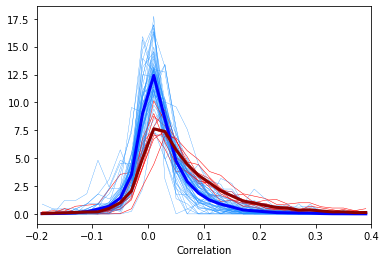

In [42]:
PlotIntraInterCorrelationHistogram(df_Krebs_0p1)
plt.savefig("correlation_histograms_Krebs_0p1.png",dpi=300)

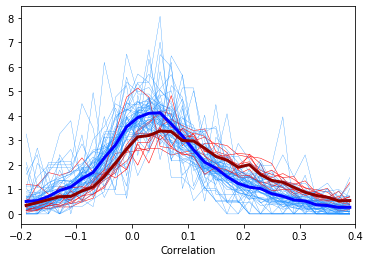

In [43]:
PlotIntraInterCorrelationHistogram(df_Krebs_1p0)
plt.savefig("correlation_histograms_Krebs_1p0.png",dpi=300)

In [14]:
# get intra and inter-region correlation histograms, all regions pooled
def PlotIntraInterCorrelationHistogramPooled(datafr):
    af = joinCellAnalysis(cell_info,datafr)
    intracorrlist = []
    intercorrlist = []
    nbins = 40
    for i in range(len(af)):
        if af.loc[i,'first_cell_region'] == af.loc[i,'second_cell_region']:
            intracorrlist = np.append(intracorrlist,af.loc[i,'corr_coef'])
        else:
            intercorrlist = np.append(intercorrlist,af.loc[i,'corr_coef'])
    histvec_intra,binedges = np.histogram(intracorrlist,range=(-0.3,0.5),bins=nbins,density=True)
    histvec_inter,binedges = np.histogram(intercorrlist,range=(-0.3,0.5),bins=nbins,density=True)
    bincentres = (binedges[1:] + binedges[0:-1])/2
    plt.plot(bincentres,histvec_intra,c='royalblue',linewidth=2,label="Within region")
    plt.plot(bincentres,histvec_inter,c='maroon',linewidth=2,label="Between region")
    plt.axvline(linewidth=1, color='black')
    plt.xlabel('Correlation')
    plt.gca().set_xlim(left=-0.3,right=0.5)
    plt.gca().set_ylim(bottom=0)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
#     plt.gca().axis('off')

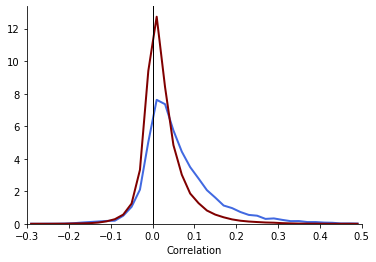

In [207]:
PlotIntraInterCorrelationHistogramPooled(df_Krebs_0p1)
plt.savefig("correlation_histograms_Krebs_0p1.svg",dpi=300)

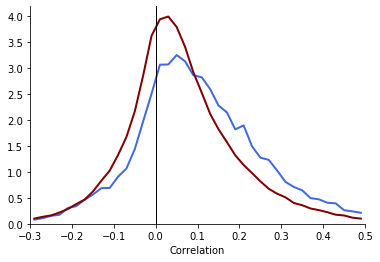

In [208]:
PlotIntraInterCorrelationHistogramPooled(df_Krebs_1p0)
plt.savefig("correlation_histograms_Krebs_1p0.svg",dpi=300)

In [195]:
# Compute JS divergence between correlation distributions
def ComputeIntraInterCorrJSDiv(datafr):
    af = joinCellAnalysis(cell_info,datafr)
    intracorrlist = []
    intercorrlist = []
    nbins = 40
    for i in range(len(af)):
        if af.loc[i,'first_cell_region'] == af.loc[i,'second_cell_region']:
            intracorrlist = np.append(intracorrlist,af.loc[i,'corr_coef'])
        else:
            intercorrlist = np.append(intercorrlist,af.loc[i,'corr_coef'])
    mean_intracorr = np.mean(intracorrlist)
    mean_intercorr = np.mean(intercorrlist)
    binmax = np.max((np.max(intracorrlist),np.max(intercorrlist)))
    binmin = np.min((np.min(intracorrlist),np.min(intercorrlist)))
    histvec_intra,binedges = np.histogram(intracorrlist,range=(binmin,binmax),bins=nbins,density=True)
    histvec_inter,binedges = np.histogram(intercorrlist,range=(binmin,binmax),bins=nbins,density=True)
    pvec_intra = histvec_intra/np.sum(histvec_intra)
    pvec_inter = histvec_inter/np.sum(histvec_inter)
    pvec_mix = 0.5*(pvec_intra+pvec_inter)
    KLdiv_intra_mix = 0
    KLdiv_inter_mix = 0
    for i in range(len(pvec_mix)):
        if pvec_mix[i]>0:
            if pvec_intra[i] > 0:
                KLdiv_intra_mix += pvec_intra[i] * np.log2(pvec_intra[i]/pvec_mix[i])
            if pvec_inter[i] > 0:
                KLdiv_inter_mix += pvec_inter[i] * np.log2(pvec_inter[i]/pvec_mix[i])
    JSdiv = 0.5*(KLdiv_intra_mix + KLdiv_inter_mix)
    return JSdiv,mean_intracorr,mean_intercorr

In [8]:
timebinstrings = ['0p005','0p01','0p05','0p1','0p2','1p0','2p0','3p0']
mousenames = ['Krebs','Robbins','Waksman']
tbin_vec = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 1.0, 2.0, 3.0])
JSdiv = np.zeros((len(mousenames),len(timebinstrings)))
meanintracorr = np.zeros((len(mousenames),len(timebinstrings)))
meanintercorr = np.zeros((len(mousenames),len(timebinstrings)))
for i in range(len(timebinstrings)):
    for j in range(len(mousenames)):
        df = pd.read_csv(filepath+mousenames[j]+'_'+timebinstrings[i]+'_analysis.csv')
        JSdiv[j,i],meanintracorr[j,i],meanintercorr[j,i]=ComputeIntraInterCorrJSDiv(df)
JSdiv_mean = np.mean(JSdiv,axis=0)
meanintracorr_mean = np.mean(meanintracorr,axis=0)
meanintercorr_mean = np.mean(meanintercorr,axis=0)

NameError: name 'filepath' is not defined

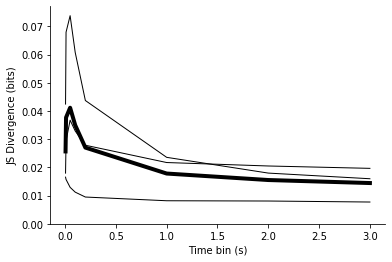

In [201]:
plt.plot(tbin_vec,JSdiv.T,linewidth=1,c='black')
plt.plot(tbin_vec,JSdiv_mean,linewidth=4,c='black')
plt.xlabel("Time bin (s)")
plt.ylabel("JS Divergence (bits)")
plt.gca().set_ylim(bottom=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("JS_divergence_vs_binsize.svg",dpi=400)

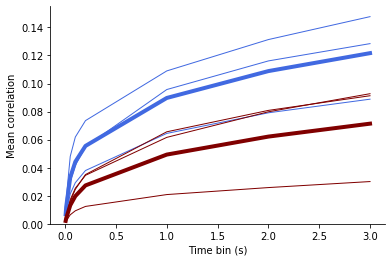

In [202]:
plt.plot(tbin_vec,meanintracorr.T,linewidth=1,c='royalblue')
plt.plot(tbin_vec,meanintercorr.T,linewidth=1,c='maroon')
plt.plot(tbin_vec,meanintracorr_mean,linewidth=4,c='royalblue')
plt.plot(tbin_vec,meanintercorr_mean,linewidth=4,c='maroon')
plt.xlabel("Time bin (s)")
plt.ylabel("Mean correlation")
plt.gca().set_ylim(bottom=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("Meancorr_vs_binsize.svg",dpi=400)

In [11]:
fr = np.load('/Users/co15268/OneDrive - University of Bristol/eightprobe/Eight_Probe/npy/firing_rate_frames/Krebs_0p1_firing.npy')

In [12]:
filepath = '/Users/co15268/OneDrive - University of Bristol/eightprobe/Eight_Probe/npy/communities/Krebs_0p1_rectified_total_signal_final_cell_info.pkl'
infile = open(filepath,'rb')
data_load = pickle.load(infile)
infile.close()

# extract cluster ids and convert to array
a = data_load["consensus_cluster"].items()
b = list(a)
c = np.array(b)
cluster_ids = c[:,1]

In [13]:
 data_load

,mouse_probe_cell_id,mouse_name,probe_id,height,total_spikes,cell_region,consensus_cluster,max_mod_cluster
37,38,Krebs,0,480,5693,LS,0,11
8,9,Krebs,0,100,5263,LS,1,9
31,32,Krebs,0,400,11477,LS,2,11
92,93,Krebs,0,400,3687,LS,1,9
39,40,Krebs,0,480,67,LS,0,11
60,61,Krebs,0,740,3603,LS,1,11
49,50,Krebs,0,620,1836,LS,1,9
96,97,Krebs,0,420,787,LS,0,11
107,108,Krebs,0,640,11593,LS,2,2
36,37,Krebs,0,480,4739,LS,2,2


In [60]:
fr

,cell_id,spike_count_mean,spike_count_std,firing_rate,firing_std
0,68,0.353483,0.702736,3.534834,7.027357
1,235,1.074660,1.345849,10.746601,13.458488
2,333,0.032107,0.285688,0.321069,2.856879
3,486,0.917966,1.346447,9.179660,13.464467
4,889,0.672940,1.132628,6.729395,11.326281
5,972,1.129349,1.590648,11.293494,15.906482
6,1019,0.140641,0.644837,1.406406,6.448367
7,1104,3.484830,2.244070,34.848299,22.440704
8,1264,0.408787,0.816548,4.087872,8.165484


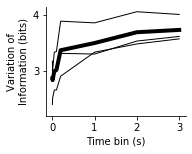

In [43]:
# plot VI
VI = np.zeros((len(mousenames),len(timebinstrings)))
VI[0]= [2.401283094216832, 2.5143022934512453, 2.659701575020738,2.659701575020738, 2.9068582481348555, 3.33497651284886, 3.482851616468643, 3.5725559546836188]
VI[1] = [3.02537161662476, 2.9907211936999274, 2.9906880353688967, 3.048792484111643, 3.3141254490190732, 3.3022492401215877, 3.5337607073777333, 3.616197844708487]
VI[2] = [3.175005546516788, 3.0052666482453816, 3.3361315280464283, 3.3469743022934577, 3.8886709035645213, 3.8586018237082076, 4.0574025974025965, 4.00891959104725]
VI_mean = np.zeros(len(timebinstrings))
for i in range(len(timebinstrings)):
    VI_mean[i] = np.mean([VI[0][i],VI[1][i],VI[2][i]])

plt.figure(figsize=(2.5,2))
plt.plot(tbin_vec,VI[0],linewidth=1,c='black')
plt.plot(tbin_vec,VI[1],linewidth=1,c='black')
plt.plot(tbin_vec,VI[2],linewidth=1,c='black')
plt.plot(tbin_vec,VI_mean,linewidth=4,c='black')
plt.xlabel("Time bin (s)")
plt.ylabel("Variation of" + "\n"+ "Information (bits)")
plt.gca().set_ylim(bottom=2.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().set_yticks([3.0, 4.0])
plt.savefig("VofI_vs_binsize.svg",dpi=400)

In [44]:
pwd()

'/Users/co15268/OneDrive - University of Bristol/eightprobe/cian_code'

In [18]:
tbin_vec

array([ 0.005,  0.01 ,  0.05 ,  0.1  ,  0.2  ,  1.   ,  2.   ,  3.   ])